**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Import data

In [2]:
txt_fdiry = file.path(
    FD_RES, 
    "region_integration",
    "fcc_astarr_macs_input_overlap",
    "analysis_enrichment_v2",
    "fcc_starrmpra_vote2_v2_split_pool_by_tss"
)
txt_fname = "results.enrich.fcc_active_vs_inactive.perm_n10k.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath)

dat_fit_summary = dat
print(dim(dat))
head(dat)

Rows: 2084 Columns: 6
── Column specification ────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): Group, Feature
dbl (4): Stat, Pval, Score, Padj

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 2084    6


Group,Feature,Stat,Pval,Score,Padj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Distal:Active,H2AFZ,45.036759,0,2.22870227,0
Distal:Active,H3K27ac,37.755824,0,1.70492830,0
Distal:Active,H3K27me3,-6.310267,0,-1.46508623,0
Distal:Active,H3K36me3,-17.250558,0,-2.25210593,0
Distal:Active,H3K4me1,15.026241,0,0.06981372,0
Distal:Active,H3K4me2,38.867563,0,1.78490428,0


In [3]:
vec_txt_region_group = c(
    "Distal:Active", "Distal:Repressive", "Proximal:Active", "Proximal:Repressive"
)

In [5]:
vec_txt_feature_subset = c(
    "CTCF", "SMC3", "POLR2A", "EP300", "REST",
    'H3K27ac', 'H3K4me1', 'H3K4me3')

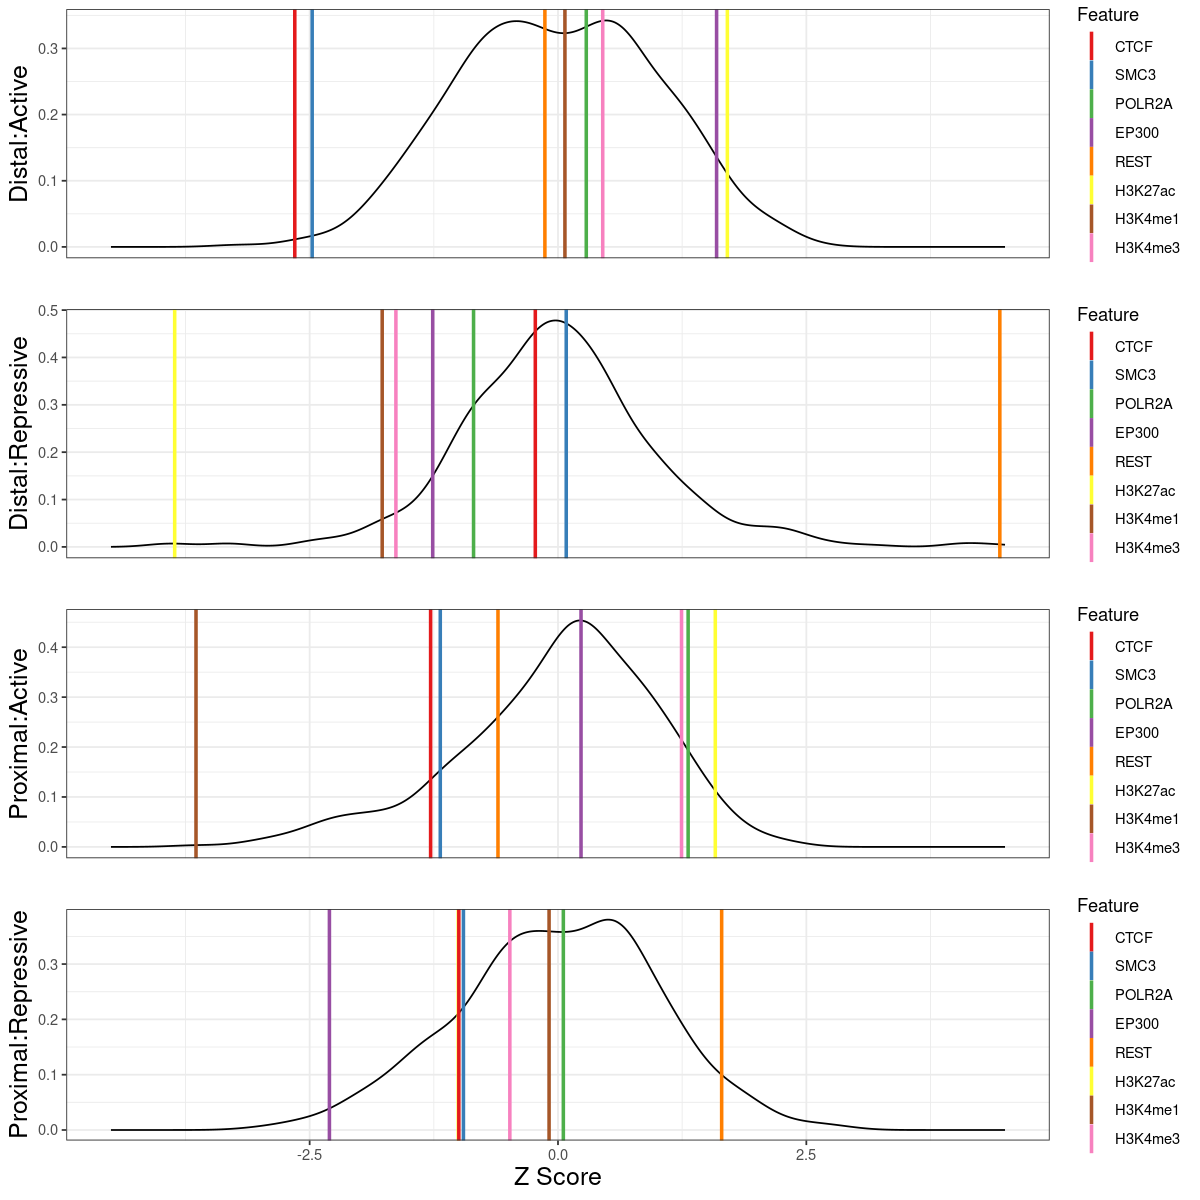

In [8]:
### split
dat = dat_fit_summary
lst = split(dat, dat$Group)

### reorder
lst = lst[vec_txt_region_group]

### generate plot
lst = lapply(names(lst), function(idx){
    dat = lst[[idx]]
    
    tmp = dat %>% dplyr::filter(Feature %in% vec_txt_feature_subset)
    tmp = tmp %>% dplyr::mutate(Feature = factor(Feature, levels=vec_txt_feature_subset))
    vec = tmp$Score
    
    gpt = ggplot() + 
        geom_density(data = dat, aes(x=Score)) +
        geom_vline(  data = tmp, aes(xintercept = Score, color = Feature), linewidth=1) +
        scale_colour_brewer(palette = "Set1") +
        labs(x = "", y = idx) +
        xlim(-4.5, 4.5) +
        theme_bw()
    return(gpt)
})

lst[[4]] = lst[[4]] + labs(x="Z Score")

### adjust style
lst = lapply(lst, function(gpt){
    gpt = gpt + theme(axis.title   = element_text(size = 15))
    return(gpt)
})

### remove the label except for the most bottom one
lst[1:3] = lapply(lst[1:3], function(gpt){
    gpt = gpt + theme(
        axis.text.x  = element_blank(),
        axis.ticks.x = element_blank(),
        
    )
    return(gpt)
})

### assign and show
lst_gpt = lst

options(repr.plot.height = 10, repr.plot.width=10)
plot_grid(plotlist = lst_gpt, ncol = 1)